In [2]:
import pandas as pd
import numpy as np
races=pd.read_csv("races.csv")
results=pd.read_csv("results.csv")
lapTimes=pd.read_csv("lapTimes.csv")
# circuits=pd.read_csv("circuits.csv")
circuits = pd.read_csv("circuits.csv", encoding='latin1')
drivers=pd.read_csv("drivers.csv", encoding='latin1')

In [3]:
races.head(2)

,raceId,year,round,circuitId,name,date,time,url
0,1,2009,1,1,Australian Grand Prix,2009-03-29,06:00:00,http://en.wikipedia.org/wiki/2009_Australian_G...
1,2,2009,2,2,Malaysian Grand Prix,2009-04-05,09:00:00,http://en.wikipedia.org/wiki/2009_Malaysian_Gr...


In [4]:
results.head(2)

,resultId,raceId,driverId,constructorId,number,grid,position,positionText,positionOrder,points,laps,time,milliseconds,fastestLap,rank,fastestLapTime,fastestLapSpeed,statusId
0,1,18,1,1,22.0,1,1.0,1,1,10.0,58,34:50.6,5690616.0,39.0,2.0,01:27.5,218.3,1
1,2,18,2,2,3.0,5,2.0,2,2,8.0,58,5.478,5696094.0,41.0,3.0,01:27.7,217.586,1


In [5]:
circuits.head(2)

,circuitId,circuitRef,name,location,country,lat,lng,alt,url
0,1,albert_park,Albert Park Grand Prix Circuit,Melbourne,Australia,-37.84970,144.968,10.0,http://en.wikipedia.org/wiki/Melbourne_Grand_P...
1,2,sepang,Sepang International Circuit,Kuala Lumpur,Malaysia,2.76083,101.738,NaN,http://en.wikipedia.org/wiki/Sepang_Internatio...


In [6]:
drivers.head(2)

,driverId,driverRef,number,code,forename,surname,dob,nationality,url
0,1,hamilton,44.0,HAM,Lewis,Hamilton,07/01/1985,British,http://en.wikipedia.org/wiki/Lewis_Hamilton
1,2,heidfeld,NaN,HEI,Nick,Heidfeld,10/05/1977,German,http://en.wikipedia.org/wiki/Nick_Heidfeld


In [7]:
merged_results = pd.merge(results, races[['raceId', 'circuitId']], on='raceId', how='left')

In [8]:
merged_results

,resultId,raceId,driverId,constructorId,number,grid,position,positionText,positionOrder,points,laps,time,milliseconds,fastestLap,rank,fastestLapTime,fastestLapSpeed,statusId,circuitId
0,1,18,1,1,22.0,1,1.0,1,1,10.0,58,34:50.6,5690616.0,39.0,2.0,01:27.5,218.3,1,1
1,2,18,2,2,3.0,5,2.0,2,2,8.0,58,5.478,5696094.0,41.0,3.0,01:27.7,217.586,1,1
2,3,18,3,3,7.0,7,3.0,3,3,6.0,58,8.163,5698779.0,41.0,5.0,01:28.1,216.719,1,1
3,4,18,4,4,5.0,11,4.0,4,4,5.0,58,17.181,5707797.0,58.0,7.0,01:28.6,215.464,1,1
4,5,18,5,1,23.0,3,5.0,5,5,4.0,58,18.014,5708630.0,43.0,1.0,01:27.4,218.385,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23772,23777,988,842,5,10.0,17,16.0,16,16,0.0,54,NaN,NaN,33.0,16.0,01:43.8,192.542,11,24
23773,23778,988,828,15,9.0,19,17.0,17,17,0.0,54,NaN,NaN,36.0,15.0,01:43.6,193.057,11,24
23774,23779,988,840,3,18.0,15,18.0,18,18,0.0,54,NaN,NaN,52.0,6.0,01:42.3,195.402,11,24
23775,23780,988,832,4,55.0,12,NaN,R,19,0.0,31,NaN,NaN,26.0,14.0,01:43.4,193.41,36,24


In [9]:
sum(merged_results.circuitId.value_counts())

23777

In [10]:
races=races.drop(columns=["circuitId"])

In [11]:
races.head(2)

,raceId,year,round,name,date,time,url
0,1,2009,1,Australian Grand Prix,2009-03-29,06:00:00,http://en.wikipedia.org/wiki/2009_Australian_G...
1,2,2009,2,Malaysian Grand Prix,2009-04-05,09:00:00,http://en.wikipedia.org/wiki/2009_Malaysian_Gr...


In [13]:
merged_results=merged_results.drop(columns=["time","milliseconds"])

In [14]:
merged_results.head(2)

,resultId,raceId,driverId,constructorId,number,grid,position,positionText,positionOrder,points,laps,fastestLap,rank,fastestLapTime,fastestLapSpeed,statusId,circuitId
0,1,18,1,1,22.0,1,1.0,1,1,10.0,58,39.0,2.0,01:27.5,218.3,1,1
1,2,18,2,2,3.0,5,2.0,2,2,8.0,58,41.0,3.0,01:27.7,217.586,1,1


In [15]:
lapTimes.head(2)

,raceId,driverId,lap,position,time,milliseconds
0,841,20,1,1,1:38.109,98109
1,841,20,2,1,1:33.006,93006


In [ ]:
# merged_results = pd.merge(merged_results, lapTimes[['raceId', 'circuitId']], on='raceId', how='left')

In [23]:
(merged_results.raceId.value_counts()).count()

976

In [24]:
(lapTimes.raceId.value_counts()).count()

395

In [ ]:
merged_results = pd.merge(results, races[['raceId', 'circuitId']], on='raceId', how='left')

In [26]:
merged_results.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23777 entries, 0 to 23776
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   resultId         23777 non-null  int64  
 1   raceId           23777 non-null  int64  
 2   driverId         23777 non-null  int64  
 3   constructorId    23777 non-null  int64  
 4   number           23771 non-null  float64
 5   grid             23777 non-null  int64  
 6   position         13227 non-null  float64
 7   positionText     23777 non-null  object 
 8   positionOrder    23777 non-null  int64  
 9   points           23777 non-null  float64
 10  laps             23777 non-null  int64  
 11  fastestLap       5383 non-null   float64
 12  rank             5531 non-null   float64
 13  fastestLapTime   5383 non-null   object 
 14  fastestLapSpeed  5383 non-null   object 
 15  statusId         23777 non-null  int64  
 16  circuitId        23777 non-null  int64  
dtypes: float64(5

In [25]:
merged_results.to_csv("FResult.csv")

In [28]:
races.to_csv("Race.csv")

In [28]:
con=pd.read_csv("dim_constructors.csv")
con.head(2)

,constructorId,constructorRef,name,nationality,url,Unnamed: 5
0,1,mclaren,McLaren,British,http://en.wikipedia.org/wiki/McLaren,NaN
1,2,bmw_sauber,BMW Sauber,German,http://en.wikipedia.org/wiki/BMW_Sauber,NaN


In [31]:
con.columns

Index(['constructorId', 'constructorRef', 'name', 'nationality', 'url'], dtype='object')

In [30]:
con=con.drop(columns=["Unnamed: 5"])

In [32]:
con.head(2)

,constructorId,constructorRef,name,nationality,url
0,1,mclaren,McLaren,British,http://en.wikipedia.org/wiki/McLaren
1,2,bmw_sauber,BMW Sauber,German,http://en.wikipedia.org/wiki/BMW_Sauber


In [33]:
con.to_csv("cons.csv")

In [36]:
dr=pd.read_csv("drivers.csv", encoding='latin1')
dr.head(2)

,driverId,driverRef,number,code,forename,surname,dob,nationality,url
0,1,hamilton,44.0,HAM,Lewis,Hamilton,07/01/1985,British,http://en.wikipedia.org/wiki/Lewis_Hamilton
1,2,heidfeld,NaN,HEI,Nick,Heidfeld,10/05/1977,German,http://en.wikipedia.org/wiki/Nick_Heidfeld


In [37]:
dr.columns

Index(['driverId', 'driverRef', 'number', 'code', 'forename', 'surname', 'dob',
       'nationality', 'url'],
      dtype='object')

In [39]:
dr=dr.drop(columns=['number', 'code'])

In [40]:
dr.to_csv("dim_drivers.csv")

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv("dim_constructors.csv")
df.head(2)

,constructorId,constructorRef,name,nationality,url,Unnamed: 5
0,1,mclaren,McLaren,British,http://en.wikipedia.org/wiki/McLaren,NaN
1,2,bmw_sauber,BMW Sauber,German,http://en.wikipedia.org/wiki/BMW_Sauber,NaN


In [19]:
data=(df.nationality.value_counts())
data

British          85
American         39
Italian          29
French           12
German           10
Japanese          5
Swiss             4
South African     3
Dutch             3
Canadian          2
Malaysian         2
Russian           2
Hong Kong         1
Irish             1
Mexican           1
Indian            1
Australian        1
New Zealand       1
Austrian          1
Rhodesian         1
Belgium           1
East German       1
Spanish           1
Brazilian         1
Name: nationality, dtype: int64

In [9]:
data =pd.DataFrame(data)

In [11]:
data.columns

Index(['nationality'], dtype='object')

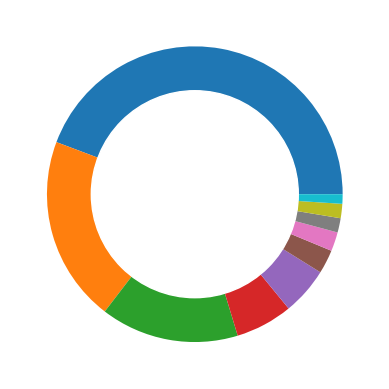

In [17]:
# Create a pieplot
plt.pie(data)

# add a circle at the center to transform it in a donut chart
my_circle=plt.Circle( (0,0), 0.7, color='white')
p=plt.gcf()
p.gca().add_artist(my_circle)

plt.show()

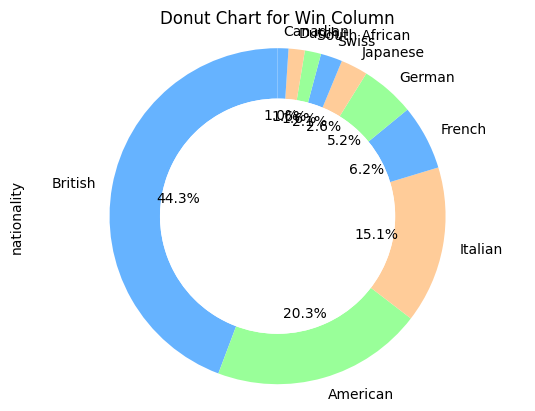

In [18]:
colors = ['#66b3ff', '#99ff99', '#ffcc99']

fig, ax = plt.subplots()
ax = ax or plt.gca()

data.plot.pie(autopct='%1.1f%%', startangle=90, colors=colors, wedgeprops=dict(width=0.3), ax=ax)

# Draw a circle at the center to create a donut chart
centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

# Equal aspect ratio ensures that the pie is drawn as a circle
ax.axis('equal')
plt.title('Donut Chart for Win Column')
plt.show()

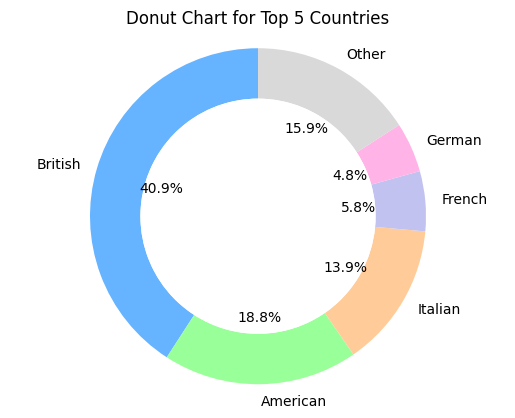

In [20]:
top_countries = data.head(5)
other_countries = pd.Series(data[5:].sum(), index=['Other'])

# Concatenate the top 5 and "Other"
final_data = pd.concat([top_countries, other_countries])

# Colors for the donut chart
colors = ['#66b3ff', '#99ff99', '#ffcc99', '#c2c2f0', '#ffb3e6', '#d9d9d9']

fig, ax = plt.subplots()
ax = ax or plt.gca()

final_data.plot.pie(autopct='%1.1f%%', startangle=90, colors=colors, wedgeprops=dict(width=0.3), ax=ax)

# Draw a circle at the center to create a donut chart
centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

# Equal aspect ratio ensures that the pie is drawn as a circle
ax.axis('equal')
plt.title('Donut Chart for Top 5 Countries')
plt.show()